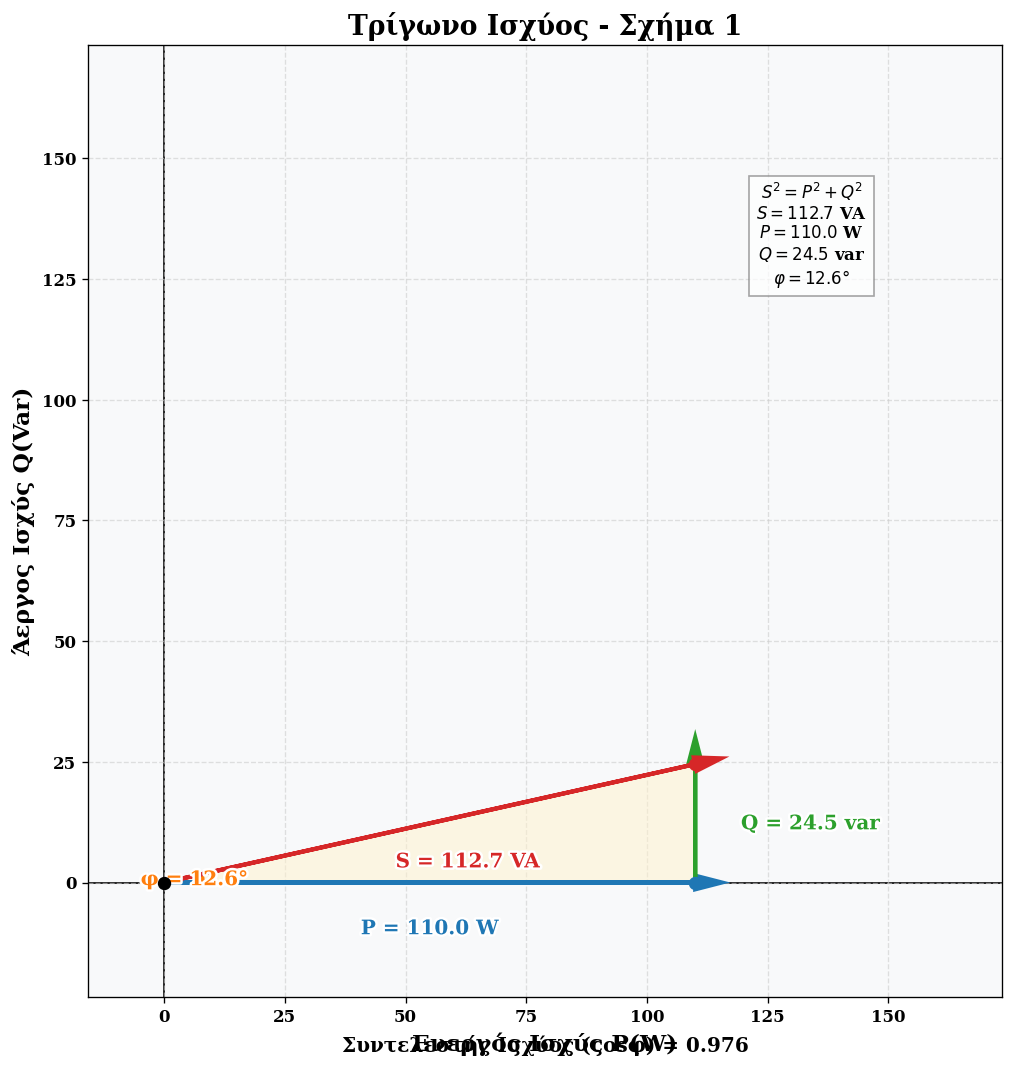

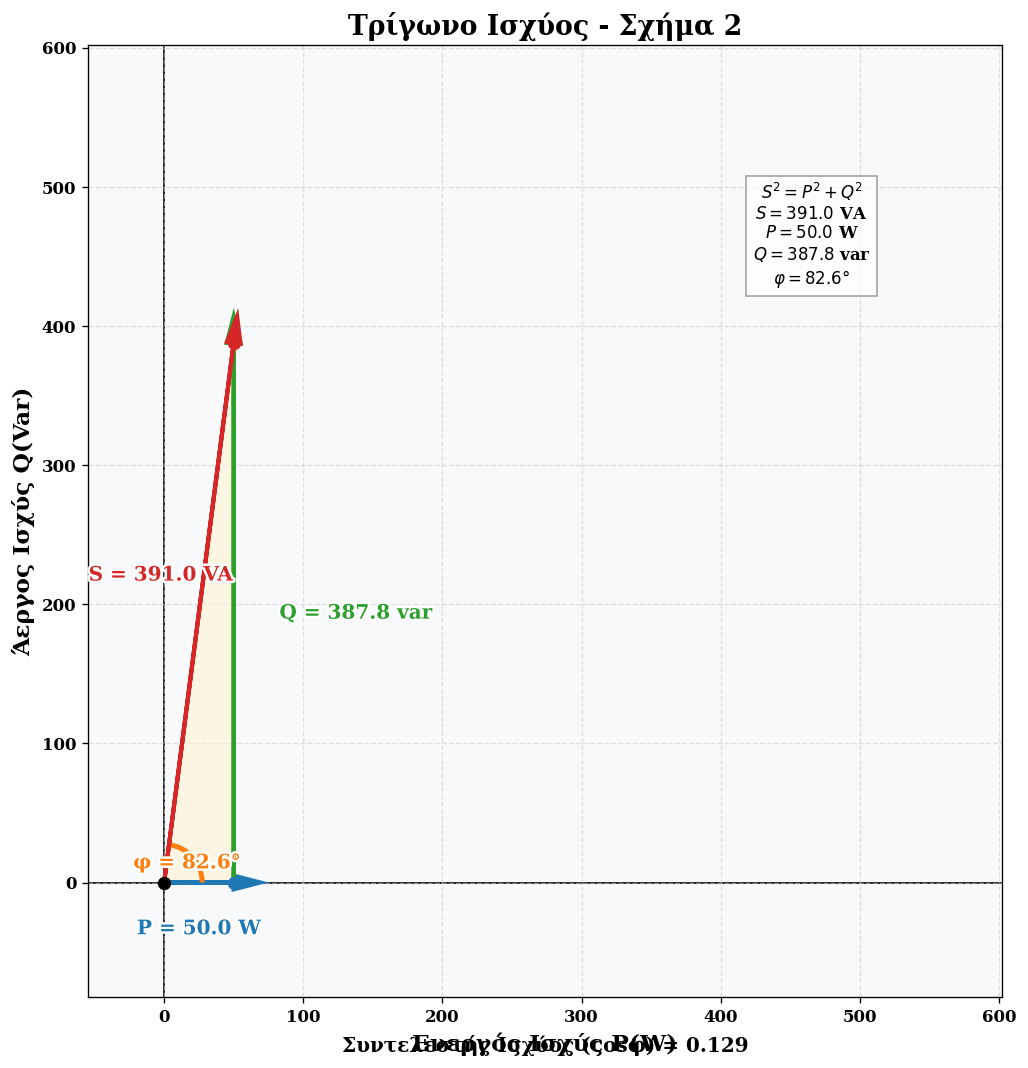

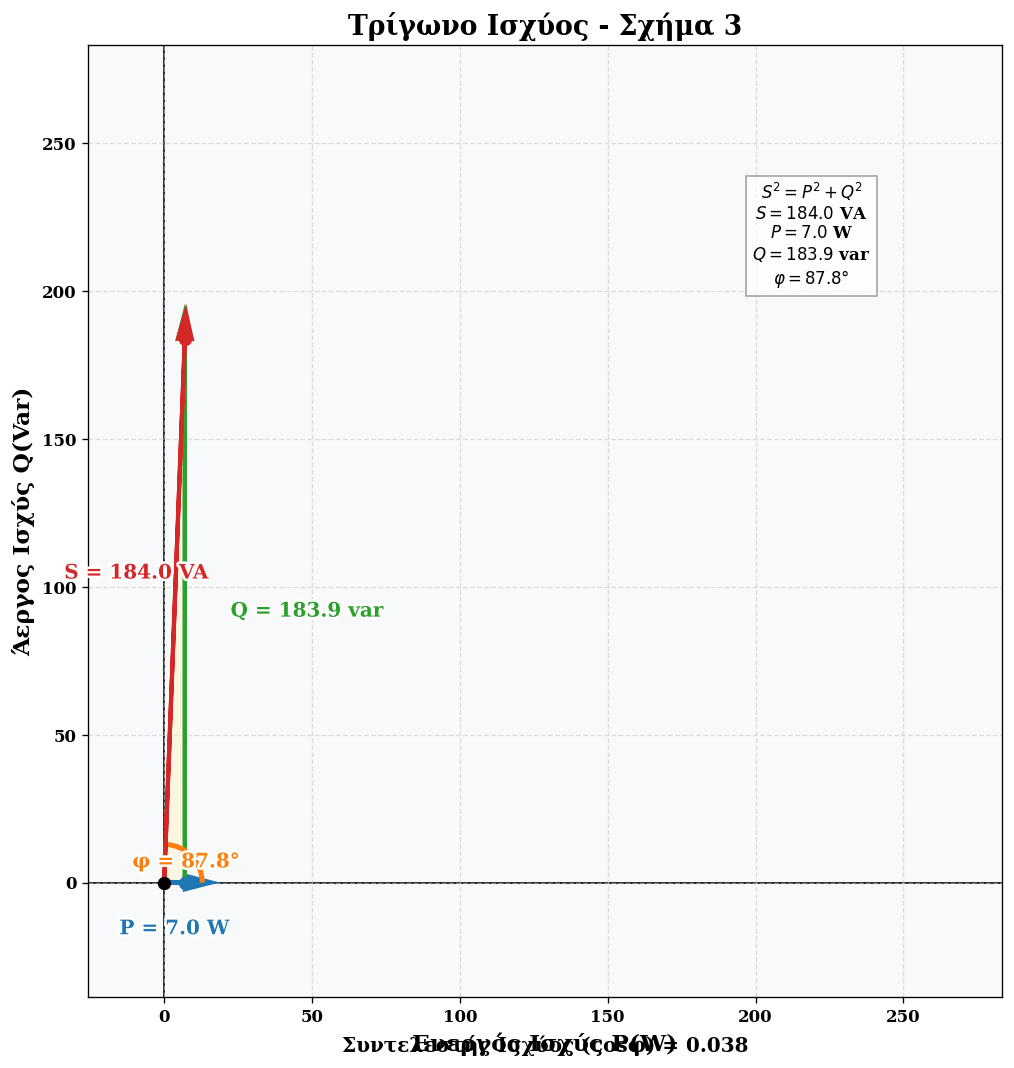

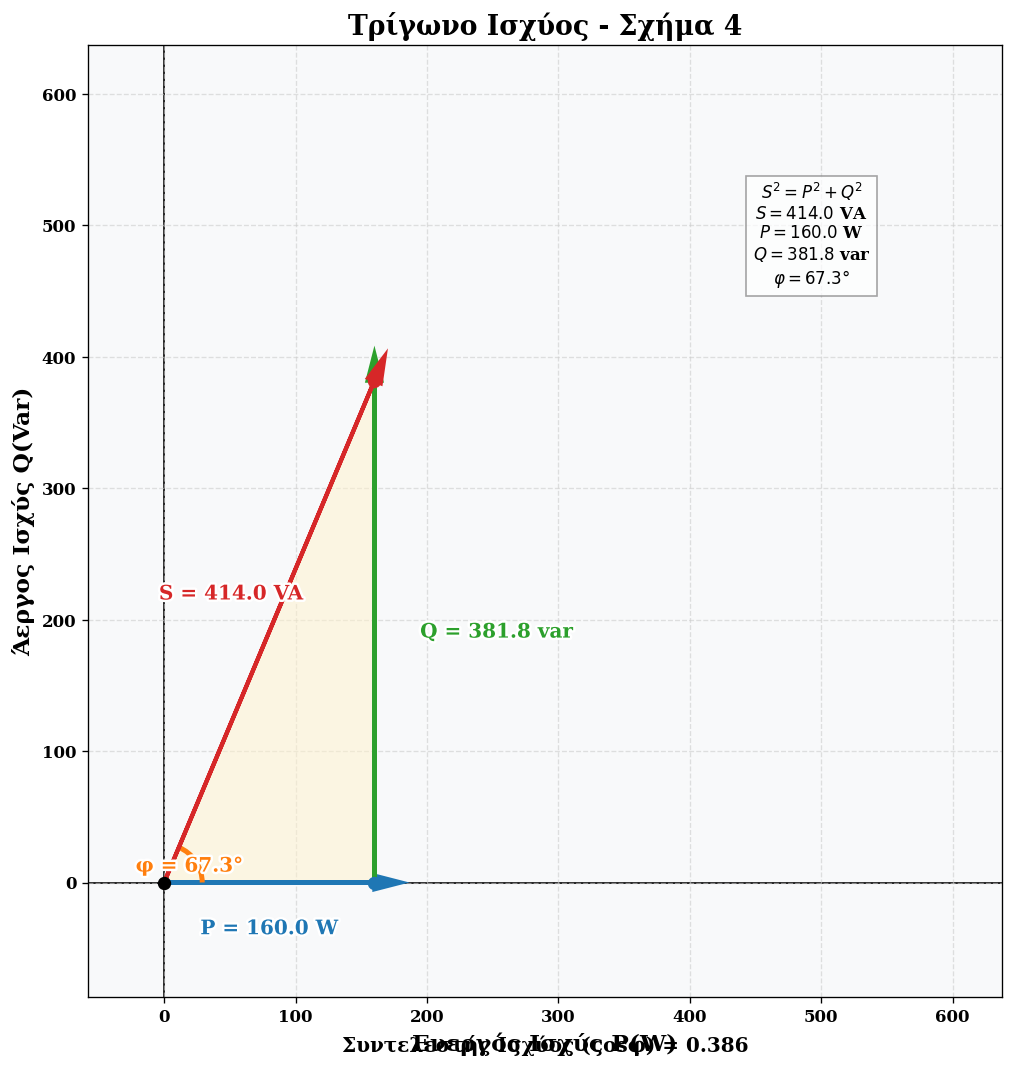

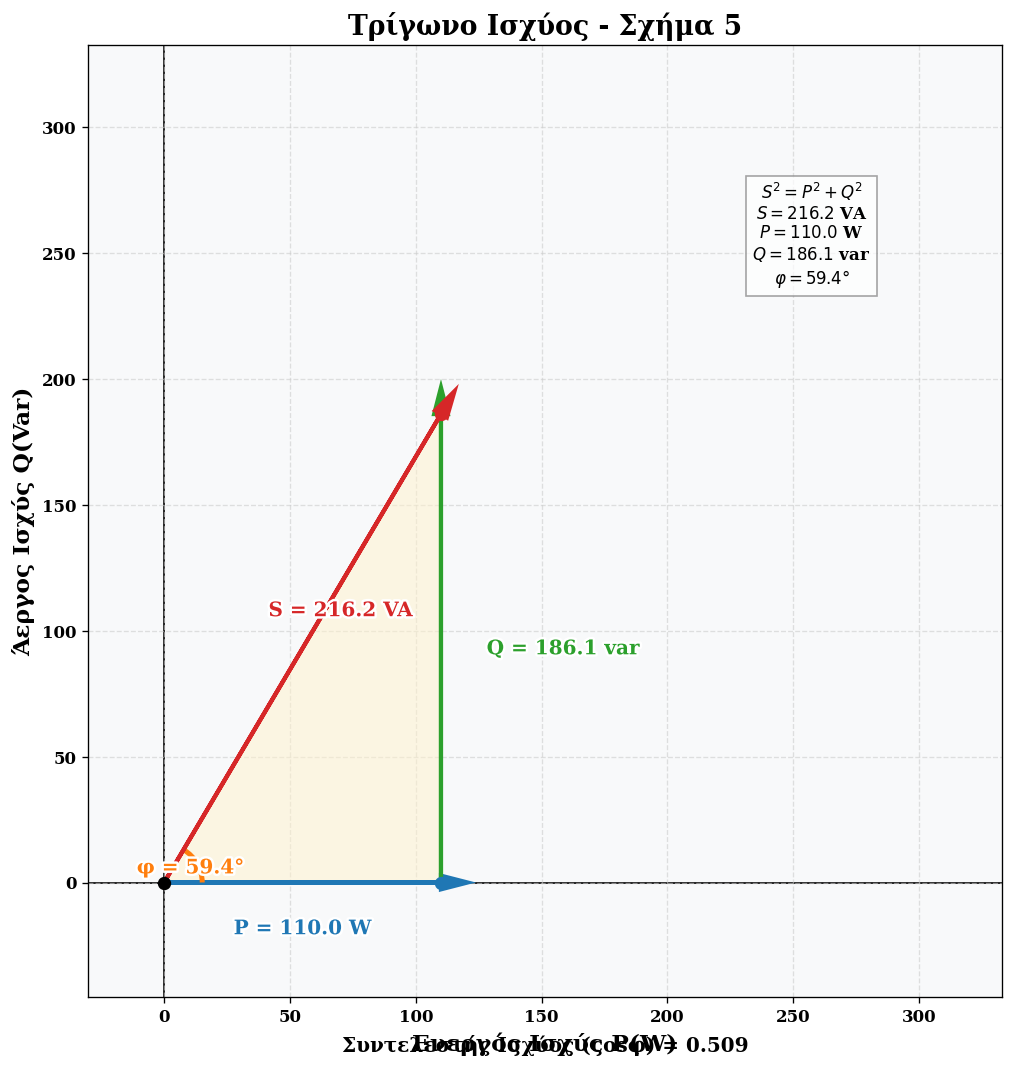

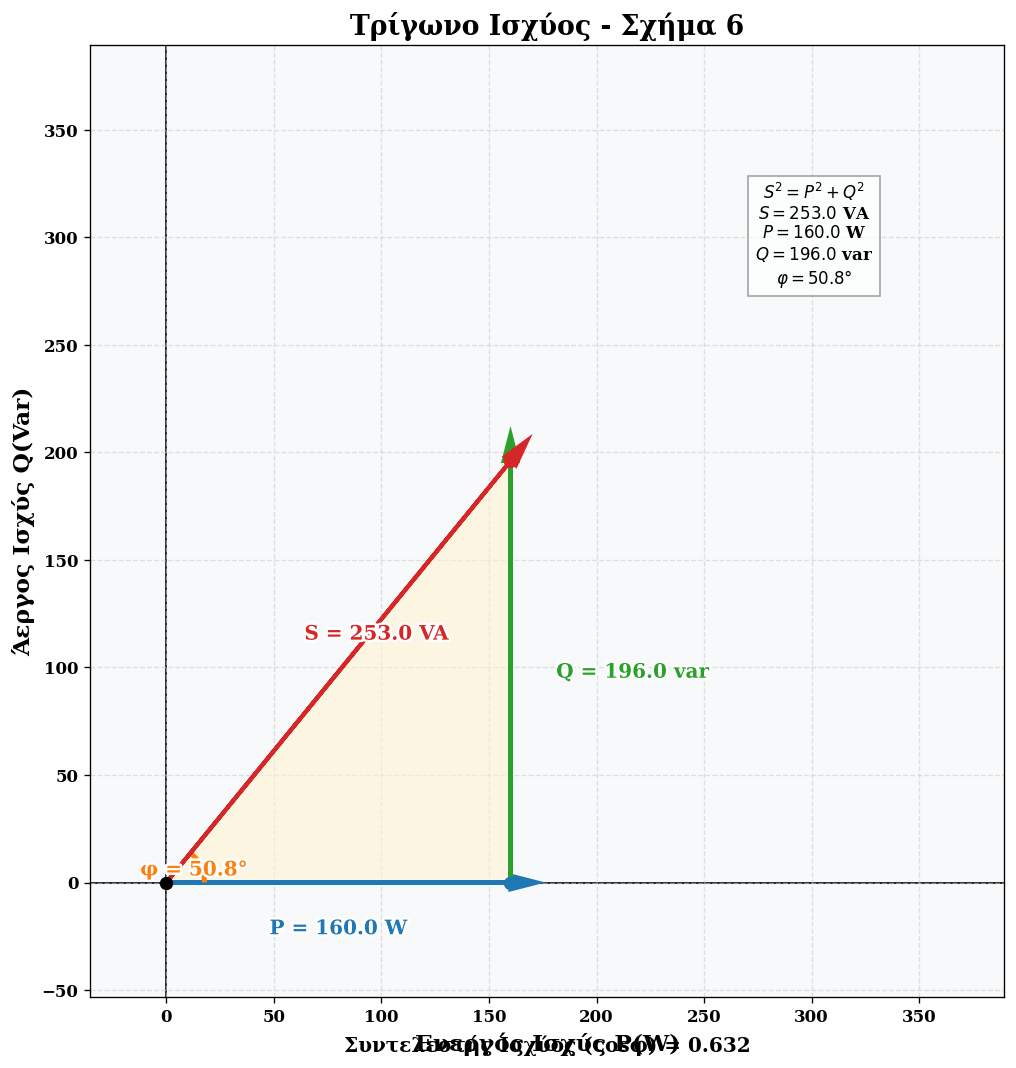

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Arc, Polygon
import matplotlib.patheffects as path_effects

# Set up matplotlib for high-quality figures
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.weight'] = 'bold'

# Power triangle data
data = [
    {"P": 110, "S": 112.7, "Q": 24.52, "phi": 12.6},
    {"P": 50, "S": 391, "Q": 387.79, "phi": 82.6},
    {"P": 7, "S": 184, "Q": 183.87, "phi": 87.8},
    {"P": 160, "S": 414, "Q": 381.83, "phi": 67.3},
    {"P": 110, "S": 216.2, "Q": 186.13, "phi": 59.4},
    {"P": 160, "S": 253, "Q": 196, "phi": 50.8},
]

# Use a professional color scheme
colors = {
    'P': '#1f77b4',      # Blue
    'S': '#d62728',      # Red
    'Q': '#2ca02c',      # Green
    'phi': '#ff7f0e',    # Orange
    'background': '#f8f9fa',
    'grid': '#cccccc',
    'triangle': '#fff2cc'
}

# Create a figure for each data point
for i, row in enumerate(data):
    P = row["P"]
    S = row["S"]
    Q = row["Q"]
    phi_deg = row["phi"]
    phi_rad = np.deg2rad(phi_deg)

    # Create a high-quality figure
    plt.figure(figsize=(12, 9))

    # Make the figure background look professional
    ax = plt.gca()
    ax.set_facecolor(colors['background'])

    # Calculate appropriate limits for the plot
    max_value = max(S, P, abs(Q)) * 1.4

    # Draw coordinate axes with solid lines
    plt.axhline(0, color='black', linewidth=1.0, zorder=1)
    plt.axvline(0, color='black', linewidth=1.0, zorder=1)

    # Set limits with padding for better viewing
    plt.xlim(-max_value * 0.1, max_value * 1.1)
    plt.ylim(-max_value * 0.15, max_value * 1.1)

    # Add a refined grid
    plt.grid(True, linestyle='--', alpha=0.6, color=colors['grid'], zorder=0)

    # Ensure equal aspect ratio
    plt.gca().set_aspect('equal', adjustable='box')

    # Calculate arrow properties (proportional to diagram size)
    arrow_width = max_value * 0.018
    arrow_head = max_value * 0.035

    # First draw the triangle fill for better layering
    triangle_vertices = np.array([[0, 0], [P, 0], [P, Q]])
    triangle = Polygon(triangle_vertices, closed=True,
                      color=colors['triangle'], alpha=0.5, zorder=2)
    ax.add_patch(triangle)

    # Draw power vectors with enhanced styling
    # Active power vector (P)
    p_arrow = plt.arrow(0, 0, P, 0, head_width=arrow_width, head_length=arrow_head,
                      fc=colors['P'], ec=colors['P'], linewidth=2.5, zorder=3)
    p_text = plt.text(P/2, -max_value*0.06, f'P = {P:.1f} W',
                     color=colors['P'], ha='center', va='center',
                     fontsize=12, fontweight='bold', zorder=5)
    # Add a subtle shadow effect to the text
    p_text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='white')])

    # Apparent power vector (S)
    s_arrow = plt.arrow(0, 0, P, Q, head_width=arrow_width, head_length=arrow_head,
                      fc=colors['S'], ec=colors['S'], linewidth=2.5, zorder=4)
    # Position the S label to avoid overlapping
    s_offset_x = 0.05 * max_value if P > max_value*0.3 else -0.05 * max_value
    s_offset_y = 0.05 * max_value if Q > max_value*0.3 else -0.05 * max_value
    s_text = plt.text(P/2 + s_offset_x, Q/2 + s_offset_y, f'S = {S:.1f} VA',
                     color=colors['S'], ha='center', va='center',
                     fontsize=12, fontweight='bold', zorder=5)
    s_text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='white')])

    # Reactive power vector (Q)
    q_arrow = plt.arrow(P, 0, 0, Q, head_width=arrow_width, head_length=arrow_head,
                      fc=colors['Q'], ec=colors['Q'], linewidth=2.5, zorder=3)
    q_text = plt.text(P + max_value*0.06, Q/2, f'Q = {Q:.1f} var',
                     color=colors['Q'], ha='left', va='center',
                     fontsize=12, fontweight='bold', zorder=5)
    q_text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='white')])

    # Mark coordinate points with enhanced markers
    plt.plot(0, 0, 'ko', markersize=7, zorder=6)  # Origin
    plt.plot(P, 0, 'o', color=colors['P'], markersize=7, zorder=6)  # P endpoint
    plt.plot(P, Q, 'o', color=colors['S'], markersize=7, zorder=6)  # S endpoint

    # Draw the angle with an improved arc
    angle_radius = max_value * 0.05

    # Use Arc patch for the angle indicator
    arc = Arc((0, 0), angle_radius*2, angle_radius*2,
              theta1=0, theta2=phi_deg, color=colors['phi'],
              linewidth=3.0, zorder=3)
    ax.add_patch(arc)

    # Add angle label with better positioning
    angle_text_radius = angle_radius * 0.8
    angle_text_x = angle_text_radius * np.cos(phi_rad / 2)
    angle_text_y = angle_text_radius * np.sin(phi_rad / 2)
    phi_text = plt.text(angle_text_x, angle_text_y, f'φ = {phi_deg:.1f}°',
                       color=colors['phi'], ha='center', va='center',
                       fontsize=12, fontweight='bold', zorder=5)
    phi_text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='white')])

    # Add dashed lines to complete the visual of the right triangle
    plt.plot([0, P], [0, Q], 'k--', linewidth=0.8, alpha=0.4, zorder=2)

    # Set labels with enhanced styling
    plt.xlabel("Ενεργός Ισχύς P(W)", fontsize=14, fontweight='bold')
    plt.ylabel("Άεργος Ισχύς Q(Var)", fontsize=14, fontweight='bold')
    plt.title(f"Τρίγωνο Ισχύος - Σχήμα {i+1}", fontsize=16, fontweight='bold')

    # Add equations to show relationships
    equations = f"$S^2 = P^2 + Q^2$\n$S = {S:.1f}$ VA\n$P = {P:.1f}$ W\n$Q = {Q:.1f}$ var\n$φ = {phi_deg:.1f}°$"
    plt.text(max_value*0.85, max_value*0.85, equations,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'),
             fontsize=10, ha='center', va='center')

    # Add power factor information
    pf = np.cos(phi_rad)
    pf_text = f"Συντελεστής Ισχύος (cosφ) = {pf:.3f}"
    plt.figtext(0.5, 0.02, pf_text, ha='center', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()